# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from shapely.geometry import Point, Polygon
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

# Carregando o dataset

In [3]:
df = pd.read_csv('../datasets/dados_imoveis.csv')

In [4]:
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


# Aula 01

Analisando a média de metragem do bairro Vila Mariana

In [6]:
sum(df['Bairro'] == 'Vila Mariana')

184

In [7]:
imoveis_vila_mariana = df[df['Bairro'] == 'Vila Mariana']
imoveis_vila_mariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [8]:
imoveis_vila_mariana['Metragem'].mean()

233.6195652173913

Analisando a quantidade de imóveis por bairro

In [9]:
n_imoveis_bairro = df['Bairro'].value_counts()
n_imoveis_bairro

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

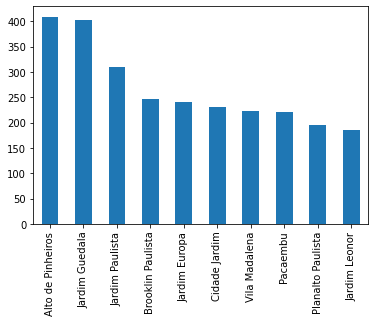

In [10]:
n_imoveis_bairro.head(10).plot.bar()
plt.show()

## Desafios - Aula 01

**1- Realizar a média de metragem de cada bairro**

In [11]:
media_metragem_bairros = df.groupby('Bairro').agg({'Metragem':'mean'}).reset_index()
media_metragem_bairros

,Bairro,Metragem
0,Aclimação,253.056818
1,Alto da Boa Vista,418.875000
2,Alto da Lapa,294.337209
3,Alto da Mooca,270.050000
4,Alto de Pinheiros,433.444988
...,...,...
696,Vila Água Funda,152.200000
697,Água Branca,191.000000
698,Água Fria,165.416667
699,Água Funda,139.000000


**2- Duas formas de selecionar os dados por bairro**

In [12]:
df.query('Bairro == "Vila Mariana"')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [13]:
df[df.eval('Bairro == "Vila Mariana"')]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


**3- Explorar alguns gráficos na documentação do Pandas e aplicar nas demais colunas do DataFrame**

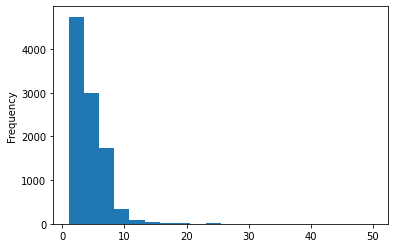

In [14]:
df['Vagas'].plot.hist(bins=20)
plt.show()

O gráfico mostra o histograma de frequência da quantidade de vagas para veículos. Podemos observar que a frequência é bastante elevada no intervalo de 0 à 10, além de uma baixa frequência no intervalo de 10 à 30 vagas.

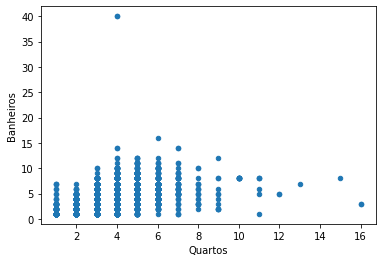

In [15]:
df.plot.scatter(x='Quartos', y='Banheiros')
plt.show()

O gráfico mostra a dispersão dos dados baseados na quantidade de quartos e banheiros que o imóvel tem. Podemos observar um ponto bastante disperso, o que pode indicar que ele foi inserido erroneamente (se pensarmos em um imóvel que tem 4 quartos e **40** banheiros!!)

**4- Pegar outras estatísticas dos dados**

In [16]:
df.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


**5- Descobrir os bairros que não possuem nome de Rua**

In [17]:
bairros_sem_rua = df[df['Rua'].isna()]['Bairro']
bairros_sem_rua

3                         Jardim Morumbi
11                      Jardim Luzitânia
31                        Parque da Lapa
56      Chácara Santo Antônio (Zona Sul)
57                        Jardim Guedala
                      ...               
9963                   Jardim Petrópolis
9989                Parque Alves de Lima
9991                        Vila Formosa
9995                       Jardim Leonor
9999                   Jardim Petrópolis
Name: Bairro, Length: 3434, dtype: object

In [18]:
len(bairros_sem_rua.value_counts())

394

In [19]:
( len(bairros_sem_rua.value_counts()) / len(df['Bairro'].value_counts()) ) * 100

56.20542082738944

Aproximadamente, 56,2% dos bairros do DataFrame possuem dados faltantes na _feature_ Rua

# Aula 02

In [20]:
df.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
905,Rua Jaguanambi,Cidade Jardim,São Paulo,585,3,4,4,R$ 20.000\n /Mês
54,"Avenida Raimundo Pereira de Magalhães, 6000",Pirituba,São Paulo,102,3,4,2,R$ 409.000
6668,NaN,Morumbi,São Paulo,685,4,6,4,R$ 4.400.000
6999,Rua Rocha Galvão,Jardim da Glória,São Paulo,305,3,3,4,R$ 1.085.000
9548,Rua dos Caciques,Vila da Saúde,São Paulo,140,3,3,2,R$ 650.000
2949,Rua Lomas Valentinas,Alto da Lapa,São Paulo,1128,4,6,6,R$ 9.000.000
1853,Rua Olegário Mariano,Jardim Guedala,São Paulo,673,4,7,8,R$ 6.500.000
5716,NaN,Chácara Santo Antônio (Zona Sul),São Paulo,750,4,5,4,R$ 3.100.000
839,Rua Sílvio Portugal,Pacaembu,São Paulo,600,4,4,2,R$ 4.500.000
6589,NaN,Jardim Paulistano,São Paulo,515,5,6,5,R$ 13.500.000


In [21]:
df['Valor'].str.split(expand=True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [22]:
df['Valor'].str.split(expand=True)[0].unique()

array(['R$'], dtype=object)

In [23]:
df['Valor'].str.split(expand=True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [24]:
df[['Moeda', 'Valor_anunciado', 'Tipo_anuncio']] = df['Valor'].str.split(expand=True)

In [25]:
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anunciado,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [26]:
df_venda = df[df['Tipo_anuncio'].isnull()]

In [27]:
df_venda.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anunciado,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [28]:
df_venda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rua              6107 non-null   object
 1   Bairro           9146 non-null   object
 2   Cidade           9156 non-null   object
 3   Metragem         9156 non-null   int64 
 4   Quartos          9156 non-null   int64 
 5   Banheiros        9156 non-null   int64 
 6   Vagas            9156 non-null   int64 
 7   Valor            9156 non-null   object
 8   Moeda            9156 non-null   object
 9   Valor_anunciado  9156 non-null   object
 10  Tipo_anuncio     0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [29]:
df_venda['Valor_anunciado'] = df_venda['Valor_anunciado'].str.replace('.', '').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df_venda.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anunciado,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.0,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.0,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.0,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.0,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.0,None


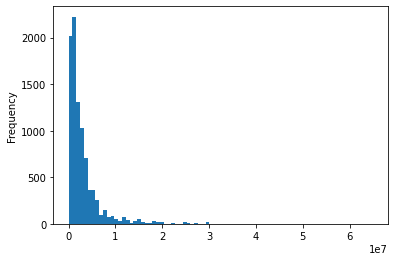

In [31]:
df_venda['Valor_anunciado'].plot.hist(bins = 80)
plt.show()

In [32]:
df_venda.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anunciado
count,9156.000000,9156.000000,9156.000000,9156.000000,9.156000e+03
mean,434.416230,3.446811,3.797073,3.960135,3.052203e+06
std,7856.422978,1.048944,1.967873,2.601022,3.944208e+06
min,10.000000,1.000000,1.000000,1.000000,1.300000e+04
25%,168.000000,3.000000,2.000000,2.000000,8.900000e+05
50%,276.000000,3.000000,4.000000,4.000000,1.800000e+06
75%,450.000000,4.000000,5.000000,5.000000,3.500000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07


In [33]:
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_venda.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anunciado
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [34]:
df_venda[['Rua', 'Bairro','Cidade']].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


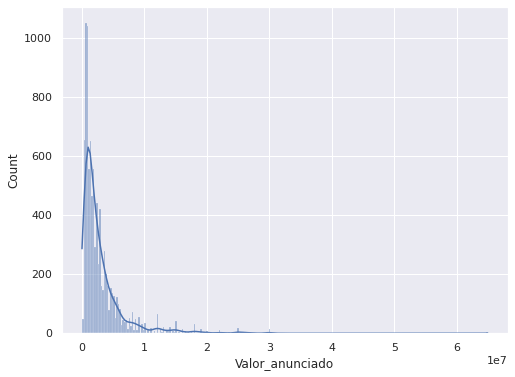

In [35]:
sns.set()
plt.figure(figsize=(8,6))
sns.histplot(data=df_venda, x='Valor_anunciado', kde=True)
plt.show()

## Desafios - Aula 02

**1- Criar uma escala de valores em milhões**

In [36]:
df_venda['Valor_milhoes'] = df_venda['Valor_anunciado'] / 1000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df_venda.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anunciado,Tipo_anuncio,Valor_milhoes
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None,7.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,3.70
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,0.38
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,0.69
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,0.54


**2- Deixar o gráfico de valores legível (alterar _labels_, cores, título, escala)**

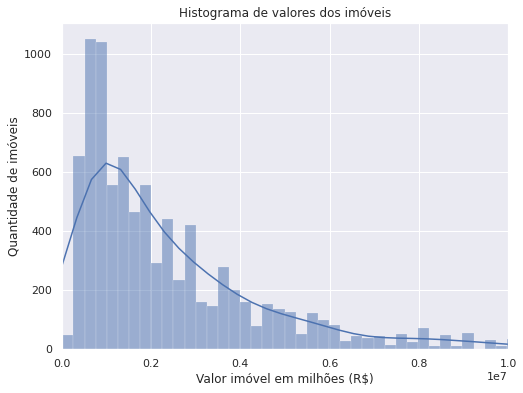

In [38]:
plt.figure(figsize=(8,6))
sns.histplot(data=df_venda, x='Valor_anunciado', kde=True)
plt.xlabel('Valor imóvel em milhões (R$)')
plt.ylabel('Quantidade de imóveis')
plt.xlim((-20, 10000000))
plt.title('Histograma de valores dos imóveis')
plt.show()

**3- Preço do metro quadrado por bairro e plotar em um gráfico ideal**

In [39]:
df_venda['Preco_metro'] = df_venda['Valor_anunciado'] / df_venda['Metragem']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
valor_metro_bairro = df_venda.groupby('Bairro').agg({'Preco_metro':'mean'}).reset_index()
valor_metro_bairro

,Bairro,Preco_metro
0,Aclimação,7656.17
1,Alto da Boa Vista,5849.57
2,Alto da Lapa,7606.73
3,Alto da Mooca,5691.74
4,Alto de Pinheiros,11269.98
...,...,...
692,Vila Água Funda,4467.13
693,Água Branca,7269.11
694,Água Fria,5841.10
695,Água Funda,3876.86


In [41]:
valor_metro_ord = valor_metro_bairro.sort_values('Preco_metro', ascending=False)
valor_metro_ord

,Bairro,Preco_metro
527,Vila Guaca,80000.00
103,Jardim América,24088.57
101,Jardim Ampliação,20051.04
155,Jardim Europa,19962.69
597,Vila Nova Conceição,17614.03
...,...,...
120,Jardim Brasília (Zona Leste),1055.01
177,Jardim Itapemirim,1054.50
453,Vila Aurea,906.59
290,Jardim Vera Cruz(Zona Leste),544.76


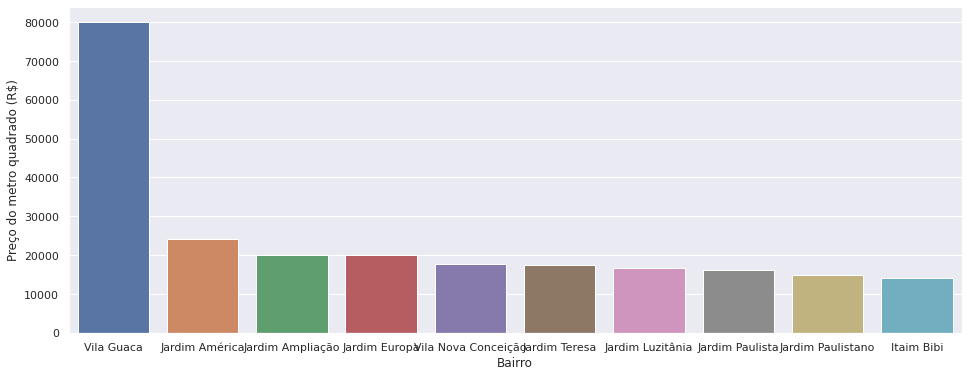

In [42]:
plt.figure(figsize=(16,6))
sns.barplot(data=valor_metro_ord[:10], x='Bairro', y='Preco_metro')
plt.ylabel('Preço do metro quadrado (R$)')
plt.show()

**4- Explorar as bibliotecas de visualizações e colocar as suas conclusões**

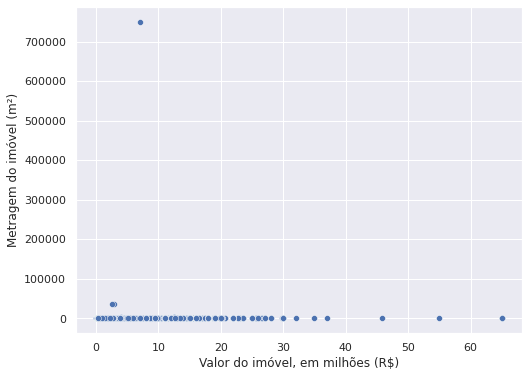

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_venda,x='Valor_milhoes', y='Metragem')
plt.xlabel('Valor do imóvel, em milhões (R$)')
plt.ylabel('Metragem do imóvel (m²)')
plt.show()

É possível notar alguns pontos que se destacam por estarem bastante dispersos da maioria dos dados, acredito que devam ser _outliers_.

**5- Pesquisar uma visualização para analisar os quartis, medianas e outliers**

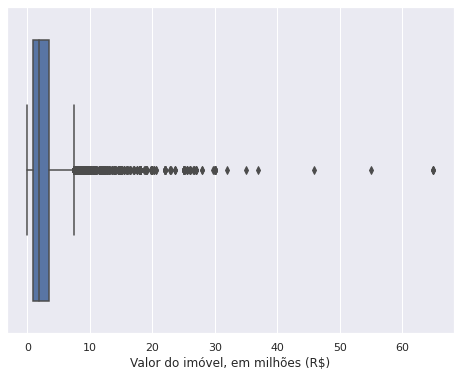

In [44]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_venda, x='Valor_milhoes')
plt.xlabel('Valor do imóvel, em milhões (R$)')
plt.show()

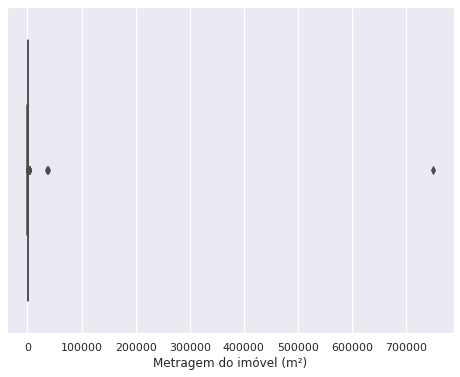

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_venda, x='Metragem')
plt.xlabel('Metragem do imóvel (m²)')
plt.show()

Por conta desse _outlier_, que ficou muito distante do resto, a visualização do Boxplot não ficou boa.

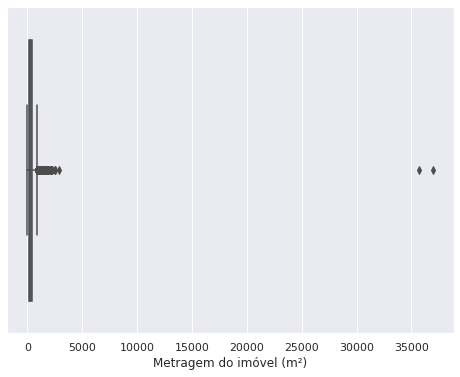

In [46]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_venda[df_venda['Metragem'] < 100000], x='Metragem')
plt.xlabel('Metragem do imóvel (m²)')
plt.show()

Mesmo retirando o útlimo _outlier_ a visualização não ficou boa. Creio que para ficar melhor será necessário limitar a metragem para inferior à 5000m².

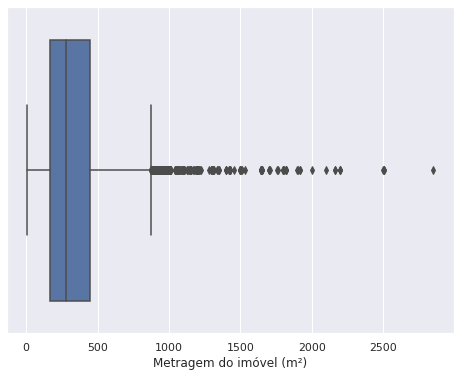

In [47]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_venda[df_venda['Metragem'] < 5000], x='Metragem')
plt.xlabel('Metragem do imóvel (m²)')
plt.show()

# Aula 03

In [48]:
df_venda.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anunciado,Tipo_anuncio,Valor_milhoes,Preco_metro
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None,7.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,3.70,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,0.38,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,0.69,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,0.54,5400.00


In [49]:
valor_m2_bairro = df_venda.groupby('Bairro').agg({'Valor_anunciado':'sum', 'Metragem':'sum'}).reset_index()
valor_m2_bairro.head()

,Bairro,Valor_anunciado,Metragem
0,Aclimação,139292801.00,19447
1,Alto da Boa Vista,19130000.00,3351
2,Alto da Lapa,166653500.00,23940
3,Alto da Mooca,23683400.00,5401
4,Alto de Pinheiros,1764815915.00,158616


In [50]:
valor_m2_bairro['Valor_m2'] = valor_m2_bairro['Valor_anunciado'] / valor_m2_bairro['Metragem']
valor_m2_bairro.head()

,Bairro,Valor_anunciado,Metragem,Valor_m2
0,Aclimação,139292801.00,19447,7162.69
1,Alto da Boa Vista,19130000.00,3351,5708.74
2,Alto da Lapa,166653500.00,23940,6961.30
3,Alto da Mooca,23683400.00,5401,4385.00
4,Alto de Pinheiros,1764815915.00,158616,11126.34


In [51]:
top_bairros = df_venda['Bairro'].value_counts()[:10].index

In [52]:
valor_m2_bairro.query('Bairro in @top_bairros')

,Bairro,Valor_anunciado,Metragem,Valor_m2
4,Alto de Pinheiros,1764815915.00,158616,11126.34
19,Brooklin Paulista,475796789.00,70002,6796.90
57,Cidade Jardim,1164210900.00,132220,8805.10
155,Jardim Europa,2414172900.00,118898,20304.57
168,Jardim Guedala,1801165587.00,972212,1852.65
187,Jardim Leonor,646326369.00,97141,6653.49
227,Jardim Paulista,2136081000.00,130283,16395.70
338,Pacaembu,867956500.00,100285,8654.90
396,Planalto Paulista,374907000.00,59250,6327.54
564,Vila Madalena,583253030.00,66250,8803.82


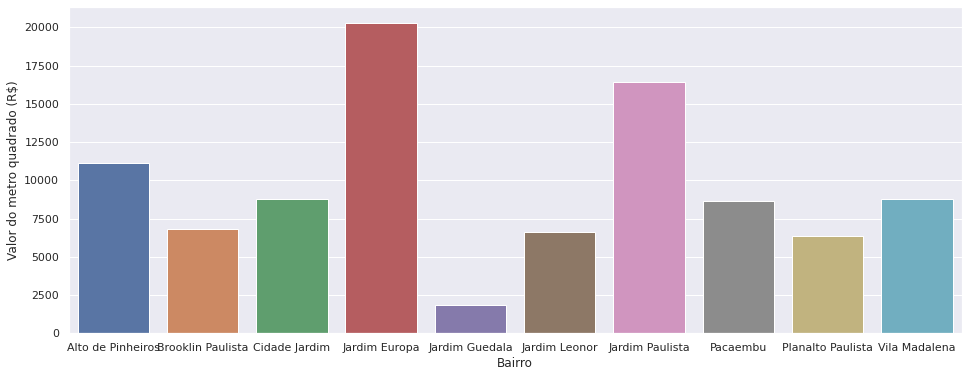

In [53]:
plt.figure(figsize=(16,6))
sns.barplot(x='Bairro', y='Valor_m2', data=valor_m2_bairro.query('Bairro in @top_bairros'))
plt.ylabel('Valor do metro quadrado (R$)')
plt.show()

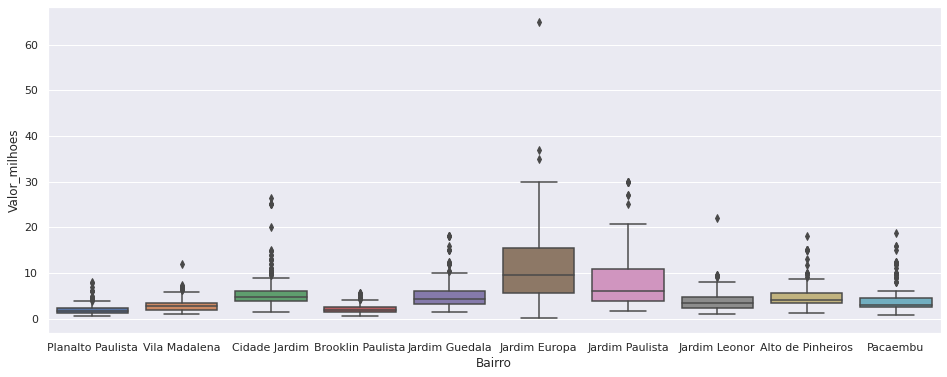

In [54]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df_venda.query('Bairro in @top_bairros'), x='Bairro', y='Valor_milhoes')
plt.show()

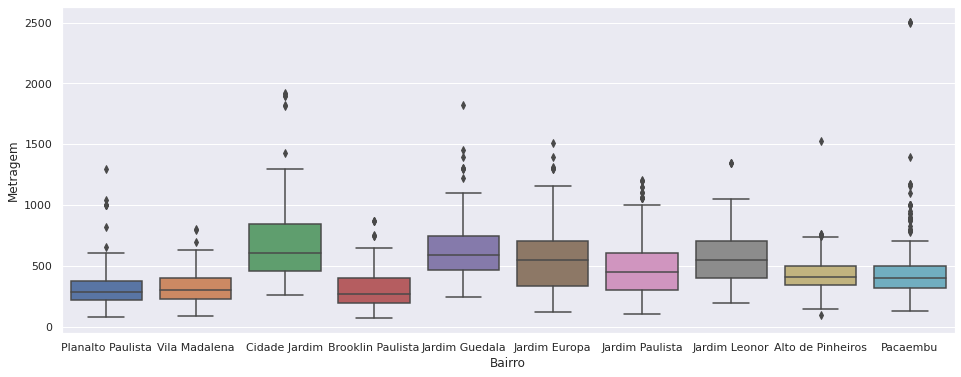

In [55]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df_venda.query('Bairro in @top_bairros & Metragem < 5000'), x='Bairro', y='Metragem')
plt.show()

In [56]:
df_ibge = pd.read_csv('../datasets/dados_ibge.csv')
df_ibge.head()

,,,,,,,,,,Cod_setor;Cod_Grandes Regi�es;Nome_Grande_Regiao;Cod_UF;Nome_da_UF ;Cod_meso;Nome_da_meso;Cod_micro;Nome_da_micro;Cod_RM;Nome_da_RM;Cod_municipio;Nome_do_municipio;Cod_distrito;Nome_do_distrito;Cod_subdistrito;Nome_do_subdistrito;Cod_bairro;Nome_do_bairro;Situacao_setor;Tipo_setor;V001;V002;V003;V004;V005;V006;V007;V008;V009;V010;V011;V012;
"355030801000001;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;266;800;3",01;2,32;2091,32;8532451,78;2164,55;8673276,78;1227,41;4285771,99;1713,75;5152087,86.00
"355030801000002;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;306;913;2",98;2,09;1650,09;3983441,31;1717,44;4030519,99;1045,78;2572133,32;1468,08;2991546,94.00
"355030801000003;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;189;625;3",31;3,08;1280,43;5474593,06;2349,53;7553913,02;902,97;2735492,52;1786,79;3837674,74.00
"355030801000004;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;181;572;3",16;2,26;1119,59;3572955,1;1859,13;4567289,5;869,09;2122409,02;1567,41;2735383,24.00
"355030801000005;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;240;754;3",14;2,35;1416,9;2240207,58;1581,66;2240109,39;917,71;1570047,75;1356,35;1725877,85.00


## Desafio - Aula 03

**1- Tentar vincular os dados do IBGE com os dados de imóveis**

In [57]:
df_ibge = pd.read_csv('../datasets/dados_ibge.csv', sep=';', encoding='ISO-8859-1', thousands='.', decimal=',')
df_ibge.head()

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86,NaN
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94,NaN
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74,NaN
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24,NaN
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85,NaN


In [58]:
df_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

In [59]:
df_ibge['Nome_do_subdistrito'].unique()

array(['ï¿½GUA RASA', 'ALTO DE PINHEIROS', 'ANHANGUERA', 'ARICANDUVA',
       'ARTUR ALVIM', 'BARRA FUNDA', 'BELA VISTA', 'BELï¿½M',
       'BOM RETIRO', 'BRï¿½S', 'BRASILï¿½NDIA', 'BUTANTï¿½',
       'CACHOEIRINHA', 'CAMBUCI', 'CAMPO BELO', 'CAMPO GRANDE',
       'CAMPO LIMPO', 'CANGAIBA', 'CAPï¿½O REDONDO', 'CARRï¿½O',
       'CASA VERDE', 'CIDADE ADEMAR', 'CIDADE DUTRA', 'CIDADE LIDER',
       'CIDADE TIRADENTES', 'CONSOLAï¿½ï¿½O', 'CURSINO',
       'ERMELINO MATARAZZO', 'FREGUESIA DO ï¿½', 'GRAJAï¿½', 'GUAIANASES',
       'MOEMA', 'IGUATEMI', 'IPIRANGA', 'ITAIM BIBI', 'ITAIM PAULISTA',
       'ITAQUERA', 'JABAQUARA', 'JAï¿½ANï¿½', 'JAGUARA', 'JAGUARï¿½',
       'JARAGUï¿½', 'JARDIM ï¿½NGELA', 'JARDIM HELENA', 'JARDIM PAULISTA',
       'JARDIM Sï¿½O LUï¿½S', 'JOSï¿½ BONIFï¿½CIO', 'LAPA', 'LIBERDADE',
       'LIMï¿½O', 'MANDAQUI', 'MARSILAC', 'MOOCA', 'MORUMBI',
       'PARELHEIROS', 'PARI', 'PARQUE DO CARMO', 'PEDREIRA', 'PENHA',
       'PERDIZES', 'PERUS', 'PINHEIROS', 'PIRITUBA', 

**2- Tratar os outliers e comparar os resultados**

In [60]:
df_venda.drop(df_venda.query('Valor_anunciado > 30000000 | Metragem > 2000').index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


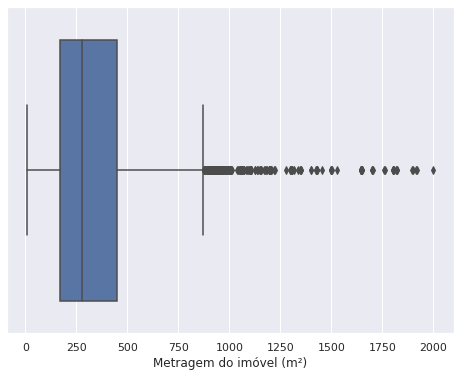

In [61]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_venda, x='Metragem')
plt.xlabel('Metragem do imóvel (m²)')
plt.show()

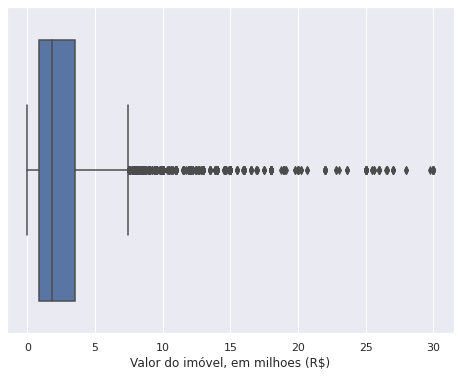

In [62]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_venda, x='Valor_milhoes')
plt.xlabel('Valor do imóvel, em milhoes (R$)')
plt.show()

Após a retirada de alguns *outliers*, a visualização ficou melhor para enxergarmos algumas estatísticas como os quartis.

**3- Agrupar por mais de uma categoria e realizar análises**

In [63]:
df_venda.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anunciado,Tipo_anuncio,Valor_milhoes,Preco_metro
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None,7.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,3.70,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,0.38,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,0.69,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,0.54,5400.00


In [64]:
df_venda.query('Bairro in @top_bairros').groupby('Bairro').agg({'Quartos':'mean', 'Banheiros': 'mean', 'Vagas': 'mean'})

,Quartos,Banheiros,Vagas
Bairro,,,
Alto de Pinheiros,3.94,4.83,4.95
Brooklin Paulista,3.47,3.85,3.71
Cidade Jardim,4.13,5.28,6.14
Jardim Europa,3.77,4.71,4.93
Jardim Guedala,4.09,5.73,6.12
Jardim Leonor,4.10,5.54,5.31
Jardim Paulista,3.86,4.63,4.40
Pacaembu,3.88,4.41,5.04
Planalto Paulista,3.46,4.17,3.88


In [65]:
df_venda.query('Bairro in @top_bairros').groupby('Bairro').agg({'Metragem':'mean', 'Valor_milhoes': 'mean'})

,Metragem,Valor_milhoes
Bairro,,
Alto de Pinheiros,429.85,4.78
Brooklin Paulista,312.51,2.12
Cidade Jardim,692.25,6.10
Jardim Europa,556.68,11.00
Jardim Guedala,631.28,5.10
Jardim Leonor,571.42,3.80
Jardim Paulista,489.79,8.03
Pacaembu,470.94,4.22
Planalto Paulista,322.01,2.04


In [66]:
df_venda.query('Bairro in @top_bairros').groupby('Bairro').agg({'Quartos':'max', 'Banheiros': 'max', 'Vagas':'max'})

,Quartos,Banheiros,Vagas
Bairro,,,
Alto de Pinheiros,7,11,15
Brooklin Paulista,6,8,10
Cidade Jardim,7,9,25
Jardim Europa,7,10,14
Jardim Guedala,7,40,20
Jardim Leonor,7,10,15
Jardim Paulista,13,10,15
Pacaembu,11,12,30
Planalto Paulista,7,12,20


In [67]:
df_venda.query('Bairro in @top_bairros').groupby('Bairro').agg({'Quartos':'min', 'Banheiros': 'min', 'Vagas':'min'})

,Quartos,Banheiros,Vagas
Bairro,,,
Alto de Pinheiros,2,1,1
Brooklin Paulista,2,1,1
Cidade Jardim,2,1,2
Jardim Europa,1,1,1
Jardim Guedala,2,1,2
Jardim Leonor,3,1,3
Jardim Paulista,2,1,1
Pacaembu,2,1,1
Planalto Paulista,2,1,1


# Aula 04

In [68]:
df_venda.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anunciado,Tipo_anuncio,Valor_milhoes,Preco_metro
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None,7.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,3.70,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,0.38,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,0.69,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,0.54,5400.00


In [69]:
enderecos = pd.read_csv('../datasets/enderecos.csv')
enderecos.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.00,-30.88,-55.55
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.00,-30.86,-55.56
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,97571374.00,-30.86,-55.55
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,97571500.00,-30.86,-55.55


In [70]:
enderecos_sp = enderecos.query('sigla_uf == "SP"')
enderecos_sp.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45


In [71]:
enderecos_sp['rua'] = enderecos_sp['tipo_logr'] + ' ' + enderecos_sp['logr_nome']
enderecos_sp['rua'] = enderecos_sp['rua'].str.lower().str.strip()
enderecos_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,rua joão antônio vasconcelos


In [72]:
df_venda['Nome_rua'] = df_venda['Rua'].str.extract(r'(^[\w ]+)')
df_venda['Nome_rua'] = df_venda['Nome_rua'].str.lower().str.strip()
df_venda.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anunciado,Tipo_anuncio,Valor_milhoes,Preco_metro,Nome_rua
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None,7.00,7000.00,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,3.70,7459.68,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,0.38,3040.00,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,0.69,2209.68,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,0.54,5400.00,rua tobias barreto


In [73]:
df_geo = pd.merge(left= df_venda, right= enderecos_sp[['rua', 'cep', 'latitude', 'longitude']], how='left',
                  left_on='Nome_rua', right_on='rua').drop_duplicates(subset=df_venda.columns).query('cep > 0')

In [74]:
df_geo.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anunciado,Tipo_anuncio,Valor_milhoes,Preco_metro,Nome_rua,rua,cep,latitude,longitude


In [77]:
setor_censo = gpd.read_file('files/35SEE250GC_SIR.shp')
setor_censo.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.00,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.00,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.00,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.00,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.00,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


In [78]:
setor_censo_sp = setor_censo[setor_censo['NM_MUNICIP'] == 'SÃO PAULO']
setor_censo_sp[setor_censo_sp.contains(Point(-46.63, -23.58))]

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry


In [79]:
df_geo['Point'] = ""
for i in df_geo.index:
  df_geo['Point'][i] = Point(df_geo['longitude'][i], df_geo['latitude'][i])

df_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anunciado,Tipo_anuncio,Valor_milhoes,Preco_metro,Nome_rua,rua,cep,latitude,longitude,Point


In [80]:
df_geo['setor_censo'] = df_geo['Point'].map(
    lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values
).str[0]

df_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anunciado,Tipo_anuncio,Valor_milhoes,Preco_metro,Nome_rua,rua,cep,latitude,longitude,Point,setor_censo


In [81]:
df_geo['setor_censo'].unique()

array([], dtype=object)

In [82]:
setor_censo_sp[setor_censo_sp.contains(Point(-46.7724671, -22.7092778))]

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry


In [83]:
setor_censo[setor_censo.contains(Point(-46.7724671, -22.7092778))]

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
1469,66381.00,350190505000028,URBANO,35019050500,None,350190505,AMPARO,3501905,AMPARO,AMPARO,CAMPINAS,None,None,1470,"POLYGON ((-46.77633 -22.71212, -46.77649 -22.7..."


In [84]:
enderecos_sp['nome_localidade'].unique()

array(['Araçatuba'], dtype=object)

Depois de analisar o porquê de não estarem sendo encontrados os pontos, percebi que a base de Endereços que foi disponibilizada está incorreta, pois não traz os endereços de São Paulo capital.

O código não está encontrando as ruas como sendo de São Paulo capital. Portanto, utilizarei a base já disponível pela Alura para continuar as análises.

In [85]:
df_geo = pd.read_csv('../datasets/dados_geo.csv')
df_geo.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,7.00,7000.00,Avenida Itacira,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),355030877000067.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,3.70,7459.68,Rua Aurelia Perez Alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,NaN,0.38,3040.00,Rua Alba Valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,NaN,0.54,5400.00,Rua Tobias Barreto,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597),355030808000050.00
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,NaN,1.98,4500.00,Rua Graham Bell,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169.00


In [86]:
df_venda_censo = pd.merge(left= df_geo, right= df_ibge, how='left',
                          left_on='setor_censo', right_on='Cod_setor')

df_venda_censo.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,...,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74,NaN
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,...,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90,NaN
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,NaN,...,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88,NaN
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,NaN,...,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69,NaN
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,NaN,...,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46,NaN


In [87]:
df_venda_censo.drop('Unnamed: 33', axis=1, inplace=True)

In [88]:
df_venda_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5605 entries, 0 to 5604
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rua                    5605 non-null   object 
 1   Bairro                 5597 non-null   object 
 2   Cidade                 5605 non-null   object 
 3   Metragem               5605 non-null   int64  
 4   Quartos                5605 non-null   int64  
 5   Banheiros              5605 non-null   int64  
 6   Vagas                  5605 non-null   int64  
 7   Valor                  5605 non-null   object 
 8   Valor_anuncio          5605 non-null   float64
 9   Tipo_anuncio           0 non-null      float64
 10  Valor_mm               5605 non-null   float64
 11  Valor_m2               5605 non-null   float64
 12  rua                    5605 non-null   object 
 13  cep                    5605 non-null   float64
 14  latitude               5605 non-null   float64
 15  long

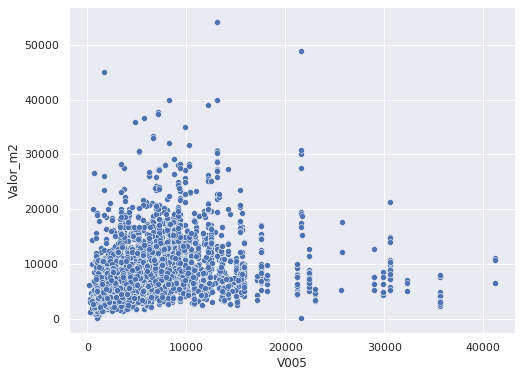

In [89]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_venda_censo, x='V005', y='Valor_m2')
plt.show()

# Aula 05

In [90]:
df_venda_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5605 entries, 0 to 5604
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rua                    5605 non-null   object 
 1   Bairro                 5597 non-null   object 
 2   Cidade                 5605 non-null   object 
 3   Metragem               5605 non-null   int64  
 4   Quartos                5605 non-null   int64  
 5   Banheiros              5605 non-null   int64  
 6   Vagas                  5605 non-null   int64  
 7   Valor                  5605 non-null   object 
 8   Valor_anuncio          5605 non-null   float64
 9   Tipo_anuncio           0 non-null      float64
 10  Valor_mm               5605 non-null   float64
 11  Valor_m2               5605 non-null   float64
 12  rua                    5605 non-null   object 
 13  cep                    5605 non-null   float64
 14  latitude               5605 non-null   float64
 15  long

In [91]:
list_features = ['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor_anuncio',
                 'Valor_mm', 'Valor_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001', 'V002', 'V003',
                 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010', 'V011', 'V012']

df_venda_censo = df_venda_censo[list_features].dropna()
df_venda_censo.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54,5400.00,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98,4500.00,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46


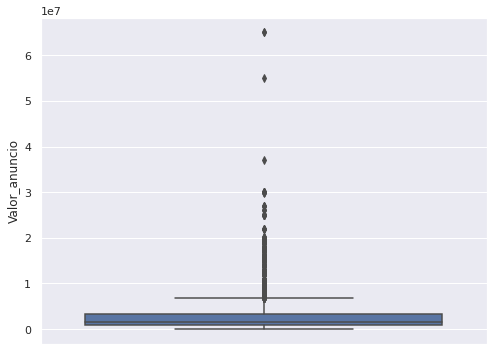

In [92]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_venda_censo, y='Valor_anuncio')
plt.show()

In [93]:
df_venda_censo.query('Valor_anuncio > 30000000 | Valor_anuncio < 100000')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
54,Rua Inglaterra,Jardim Europa,São Paulo,200,3,3,2,13000.00,0.01,65.00,...,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
89,Rua Inglaterra,Jardim Europa,São Paulo,756,5,4,10,37000000.00,37.00,48941.80,...,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
1032,Praça Nicolau Scarpa,Jardim América,São Paulo,1200,4,4,25,65000000.00,65.00,54166.67,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57
3521,Rua Estados Unidos,Jardim América,São Paulo,1816,4,10,20,55000000.00,55.00,30286.34,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57
3896,Rua Estados Unidos,Jardim América,São Paulo,1200,4,6,24,65000000.00,65.00,54166.67,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57


In [94]:
df_venda_censo.drop(df_venda_censo.query('Valor_anuncio > 30000000 | Valor_anuncio < 100000').index, inplace=True)

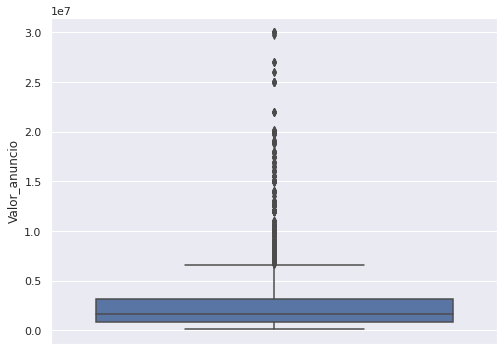

In [95]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_venda_censo, y='Valor_anuncio')
plt.show()

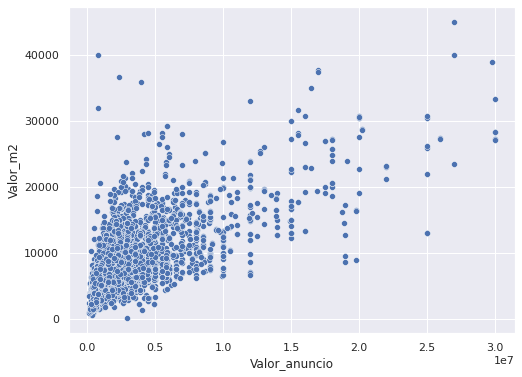

In [96]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_venda_censo, x='Valor_anuncio', y='Valor_m2')
plt.show()

In [97]:
df_venda_censo.corr()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,Situacao_setor,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
Metragem,1.00,0.23,0.23,0.27,0.30,0.30,0.06,-0.09,-0.13,0.48,...,0.13,0.05,0.22,0.07,0.23,0.05,0.20,0.07,0.21,0.05
Quartos,0.23,1.00,0.55,0.42,0.37,0.37,0.12,-0.01,-0.19,-0.01,...,0.16,0.07,0.32,0.12,0.33,0.11,0.31,0.13,0.32,0.11
Banheiros,0.23,0.55,1.00,0.46,0.47,0.47,0.22,-0.03,-0.25,-0.03,...,0.21,0.07,0.41,0.11,0.41,0.08,0.39,0.11,0.40,0.08
Vagas,0.27,0.42,0.46,1.00,0.48,0.48,0.15,-0.04,-0.19,-0.01,...,0.24,0.09,0.34,0.11,0.34,0.08,0.32,0.12,0.33,0.09
Valor_anuncio,0.30,0.37,0.47,0.48,1.00,1.00,0.70,0.02,-0.21,-0.00,...,0.13,0.08,0.45,0.11,0.45,0.07,0.47,0.13,0.45,0.08
Valor_mm,0.30,0.37,0.47,0.48,1.00,1.00,0.70,0.02,-0.21,-0.00,...,0.13,0.08,0.45,0.11,0.45,0.07,0.47,0.13,0.45,0.08
Valor_m2,0.06,0.12,0.22,0.15,0.70,0.70,1.00,0.05,-0.18,-0.03,...,-0.13,0.01,0.29,0.04,0.28,0.02,0.37,0.05,0.32,0.02
latitude,-0.09,-0.01,-0.03,-0.04,0.02,0.02,0.05,1.00,0.15,-0.03,...,-0.05,0.03,-0.05,-0.09,-0.07,-0.07,-0.04,-0.07,-0.07,-0.06
longitude,-0.13,-0.19,-0.25,-0.19,-0.21,-0.21,-0.18,0.15,1.00,-0.01,...,-0.05,0.02,-0.36,-0.10,-0.36,-0.07,-0.38,-0.10,-0.37,-0.07
Situacao_setor,0.48,-0.01,-0.03,-0.01,-0.00,-0.00,-0.03,-0.03,-0.01,1.00,...,0.03,0.00,-0.03,-0.01,-0.03,-0.01,-0.04,-0.01,-0.03,-0.00


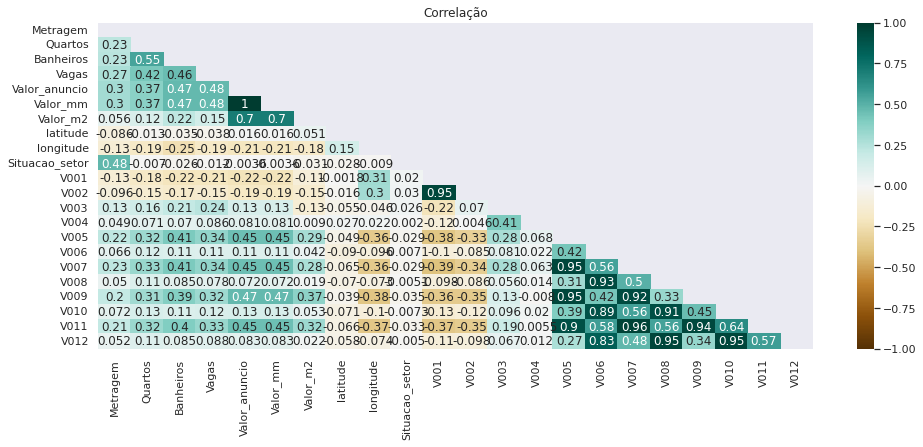

In [98]:
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(df_venda_censo.corr(), dtype=bool))
sns.heatmap(df_venda_censo.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlação')
plt.show()

Teste inicial do modelo, utilizando somente a metragem.

In [99]:
X = df_venda_censo[['Metragem']]
y = df_venda_censo['Valor_anuncio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=54)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [100]:
y_predict = model_lr.predict(X_test)
y_predict

array([4535135.54576314, 2319529.74583429, 2424501.59358835, ...,
       2802400.24550293, 2483285.82833061, 2854186.3570616 ])

In [101]:
y_test

172    4500000.00
4513    345000.00
4865    800000.00
4979   4000000.00
1255   5100000.00
          ...    
5240   1600000.00
4472    580000.00
3291   2200000.00
432    1500000.00
2455   2800000.00
Name: Valor_anuncio, Length: 1326, dtype: float64

In [102]:
mean_absolute_error(y_test, y_predict)

1770626.9062636306

Utilizando outras *features* no modelo.

In [103]:
X = df_venda_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'latitude', 'longitude', 'Situacao_setor',
                    'V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010', 'V011', 'V012']]
y = df_venda_censo['Valor_anuncio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=54)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [104]:
y_predict = model_lr.predict(X_test)
y_predict

array([7777357.88416371, -113315.65128264, 1573321.59723443, ...,
       3037120.59565741, 1165383.07333872, 3824904.9823629 ])

In [105]:
y_test

172    4500000.00
4513    345000.00
4865    800000.00
4979   4000000.00
1255   5100000.00
          ...    
5240   1600000.00
4472    580000.00
3291   2200000.00
432    1500000.00
2455   2800000.00
Name: Valor_anuncio, Length: 1326, dtype: float64

**Mean Absolute Erro**:  melhor quanto mais próx. de 0

In [106]:
mean_absolute_error(y_test, y_predict)

1333549.3313258274

**R² score**: melhor quanto mais próx. de 1

In [107]:
r2_score(y_test, y_predict)

0.40346952435618333

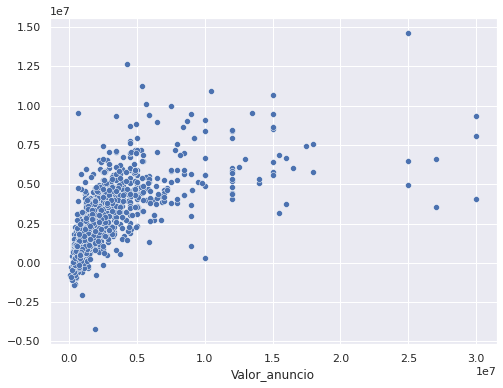

In [108]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_predict)
plt.show()

# Desafio geral

## Melhorar o modelo

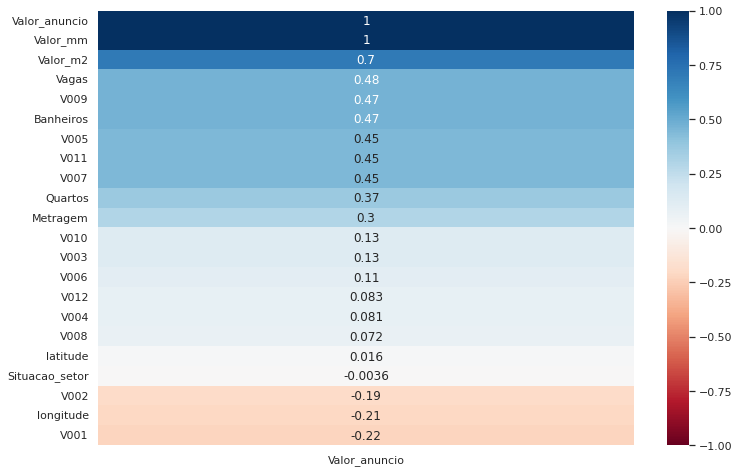

In [109]:
corr = df_venda_censo.corr().sort_values('Valor_anuncio',ascending=False)
plt.figure(figsize=(12,8))
ax = sns.heatmap(corr[['Valor_anuncio']], vmin=-1, vmax=1, cmap='RdBu', annot=True)

Algumas *features* não serão selecionadas, pois ou possuem baixa correlação com o valor do imóvel, ou são calculadas a partir desse valor, portanto possuem uma elevada correlação justamente por derivarem desse valor.

In [110]:
list_features = ['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'longitude', 'V001', 'V002', 'V003',
                 'V005', 'V006', 'V007', 'V009', 'V010', 'V011']

In [111]:
df_scaled = df_venda_censo.copy()

scaler = StandardScaler()
scaler.fit(df_venda_censo[list_features])

df_scaled[list_features] = scaler.transform(df_venda_censo[list_features])
df_scaled.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,Situacao_setor,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
count,5303.00,5303.00,5303.00,5303.00,5303.00,5303.00,5303.00,5303.00,5303.00,5303.00,...,5303.00,5303.00,5303.00,5303.00,5303.00,5303.00,5303.00,5303.00,5303.00,5303.00
mean,-0.00,-0.00,0.00,-0.00,2678459.54,2.68,7610.02,-23.58,-0.00,1.01,...,-0.00,2.12,-0.00,0.00,0.00,255201564.42,-0.00,-0.00,-0.00,189228232.21
std,1.00,1.00,1.00,1.00,3232044.16,3.23,4608.61,0.05,1.00,0.18,...,1.00,0.94,1.00,1.00,1.00,1761295182.31,1.00,1.00,1.00,1339561640.09
min,-0.56,-2.37,-1.47,-1.16,130000.00,0.13,78.38,-23.86,-2.29,1.00,...,-3.59,0.70,-1.11,-0.20,-1.04,70021.07,-1.40,-0.21,-1.18,58440.21
25%,-0.31,-0.40,-0.93,-0.75,850000.00,0.85,4665.38,-23.61,-0.72,1.00,...,-0.61,1.72,-0.67,-0.19,-0.66,8170308.83,-0.73,-0.20,-0.69,6234121.36
50%,-0.14,-0.40,-0.39,-0.33,1600000.00,1.60,6400.00,-23.58,-0.20,1.00,...,0.04,2.05,-0.29,-0.17,-0.27,26770139.14,-0.20,-0.18,-0.23,22074354.68
75%,0.14,0.59,0.70,0.50,3180000.00,3.18,9074.41,-23.55,0.57,1.00,...,0.70,2.40,0.34,-0.10,0.34,100647749.63,0.45,-0.10,0.37,69666540.45
max,65.69,7.49,5.61,14.17,30000000.00,30.00,45000.00,-23.43,4.99,8.00,...,5.67,32.90,6.94,20.62,7.41,35468624352.67,7.73,18.29,9.87,28642067613.82


In [112]:
X = df_scaled[list_features]
y = df_scaled['Valor_anuncio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [113]:
y_predict = model_lr.predict(X_test)

In [114]:
print('Mean absolute error: ', mean_absolute_error(y_test, y_predict))
print('R2 Score: ', r2_score(y_test, y_predict))

Mean absolute error:  1307857.6635247432
R2 Score:  0.3999886116500505


Valores de comparação:


*   Mean Absolute Error - 1333549.3313258274
*   R2 Score - 0.40346952435618333



O *Mean Absolute Error* melhorou, porém o *R2 Score* diminuiu.

É possível melhorar ainda mais utilizando o *Cross Validation*.

In [115]:
scores = cross_val_score(model_lr, X_train, y_train, scoring='r2', cv=5)
print(scores)

[-8.39043082  0.44481041  0.4230696   0.32799495  0.45283788]


In [116]:
scores = cross_val_score(model_lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
print(scores)

[-1579476.62486482 -1421942.27790526 -1378553.65898671 -1451550.99523591
 -1287805.21509134]


Os resultados foram satisfatórios, é possível notar uma melhora na maioria dos resultados com o *R2 Score* e uma única melhora no valor do *MAE*.

Utilizarei o *Recursive Feature Elimination (RFE)* para selecionar 10 *features*.

In [117]:
select = RFE(model_lr, n_features_to_select=10, step=1)
select = select.fit(X_train, y_train)

scores = cross_val_score(select, X_train, y_train, scoring='r2', cv=5)
print(scores)

[-8.7145515   0.44270864  0.41758916  0.30736238  0.45544976]


In [118]:
scores = cross_val_score(select, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
print(scores)

[-1596169.36782389 -1431527.95781029 -1381198.03710069 -1475460.5675951
 -1281189.33300004]


Os resultados ainda assim foram bastante similares aos encontrados anteriormente.

In [119]:
y_predict = select.predict(X_test)

print('Mean absolute error: ', mean_absolute_error(y_test, y_predict))
print('R2 Score: ', r2_score(y_test, y_predict))

Mean absolute error:  1305993.0535041573
R2 Score:  0.4010946014381812


Diferença entre os valores das métricas calculados durante as aulas da Imersão Alura e os valores das métricas posteriores:

*   **Mean Absolute Error:** 27556.28, aproximadamente
*   **R2 Score:** 0.0023749229180021203

Foi possível melhorar o MAE, ainda que o *R2 Score* tenha tido uma leve redução do valor.